<H2>Notes from Mastering Predictive Analytics with Scikit-Learn and TensorFlow - Ch. 4 and 5</H2>

In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<H3>Chapter 4: Intro to Artificial Neural Networks and Tensorflow</H3>

<H4>Elements of an Multilayer Perceptron (MLP) Model:</H4>
    
<ul>
<li><i>Architecture</i> -- number of layers, number of neurons per layer. Inputs match feature list, outputs equal number of classes or 1 in regression. Question is number of hidden layers and number of neurons per hidden layer which are between number of inputs and outputs.</li> 
<li><i>Activation Function</i> -- function used in every neuron in hidden layers. Sigmoid was the first function that was used. Today, number of others including Rectivited Linear Unit (ReLu), hyperbolic tangent, leaky ReLU, and others.</li>
<li><i>Optimization Algorithm</i> -- used to learn the weights of the network. Each algorithm has different hyperparameters. Most basic is gradient descent. Others are momentump optimizers, AdaGrad, RMSProp and the Adam moment.</li>
<li><i>Loss Function</i> -- function yielding the quantity that is minimized by the optimizer. For regression, often mean squared error (MSE). With classification could be cross entropy, square loss and hinge loss. Functin determines how weights are adjust  
<li><i>Weight Initialization Strategy</i> -- Weights for each perceptron in your network must be initialized with some values which will be progressively changed by the optimizer. All zeros can be used, or possibility random normal numbers, or others.</li>
<li><i>Regularization Strategy</i> -- Optional by often recommended because deep learning has a tendency to overfit the (training) data due to quatity of parameters. Choices include L1 regularization, L2 regularization, dropout regularization, etc.</li>
<li><i>Training Strategy</i> -- way data will be presented to the training algorithm. Not part of model but influences results. Key elements of strategy include epochs, batch size, number of iterations (number of training steps and adjustments that optimization algorithm makes to weights). Iterations = epochs * (training examples/ batch size).</li>
</ul>
        

<H4>Core Concepts in Tensorflow:</H4>
    
<ul>
    <li><i>Tensors</i> -- central unit of data. Consists of a set of primitive values shaped into an array of any number of dimensions (similar to multidimensional array in numpy). Number of dimensions determine <i>rank</i> of tensor. Single number implies rank of 0; vector is rank of 1; matrix is rank of 2; array of matrices is a rank of n.</li>
    <li><i>Computational Graphs</i> -- series of TensorFlow operations (ops) arranged into a graph of nodes. The nodes of the graph are operations (including assignments of values). The values/edges that flow through the computational graph from one node to aother are 'tensors'. The graph is first defined and then run or executed.</li>
    <li><i>Sessions</i> -- an object that encasulates the environment in which objects are executed.</li>
    <li><i>Variables</i> -- objects that are initialized with a value. The value of a variable can change during the runnig or execution of the graph. Typically they are trainable variables in machine learning models.</li>
    <li><i>Placeholders</i> -- promise to provide a value later. Operates much like a 'int' or 'float' statement in a programming language. Usually the placeholders are training and testing values.</li>
    <li><i>Constants</i> -- objects whose values never change. Again, like a 'const' statement.</li>
</ul>

At least with versions prior to tensorflow 2.0, variables, placeholders, constants, and operations are define first. Then they are run or evaluated under the umbrella of a 'session'. It's only when they are run, that the values actually materialize.

<h4>Examples of Tensor Concepts</h4>

<ol>
    <li>Simple Examples</li>
    <li>Simple Function</li>
    <li>More Complex Function</li>
    <li>Linear Model</li>
</ol>

In [77]:
# first import libraries of interest -- in this case we'll need just 'tensorflow'

import tensorflow as tf

<i>Simple Examples</i>
<ul>
    <li>Assign and print value of a Constant (c = 5)</li>
    <li>Assign and either run or evaluate the value of a placeholder object</li>
</ul>

In [78]:
 # define a tensor 'constant object'
    
c = tf.constant(5)

In [79]:
 # when you print the constant you'll see its 'type' not its value

print(c) 

Tensor("Const_4:0", shape=(), dtype=int32)


In [80]:
# in order to realize the value you need to create a session object
# then run session. Also, it's a good idea to close a session after completion

sess = tf.Session()
sess.run(c)

sess.close()

5

In [81]:
# define a placeholder object -- here a 32 bit integer
# define a session object -- here using 'with' statement
# then either 'run' the session or evaluate the placeholder
# note: the 'feed_dict' assigns a value to the placeholder

d = tf.placeholder(tf.int32)

with tf.Session() as sess:  # define a session object
    
    sess.run(d, feed_dict={d:10}) # alternative 1 -- run the placeholder object
    print(d)
    
    d.eval(feed_dict={d:5}) # alternative 2 -- evaluate the placeholder object
    print(d) 
    
sess.close() #close the session after completion

array(10)

Tensor("Placeholder_22:0", dtype=int32)


array(5)

Tensor("Placeholder_22:0", dtype=int32)


<i>Simple Function</i>

f(y) = 4 * y where y = 10

In [82]:
y = tf.placeholder(tf.float32)
mult_node = 4 * y

sess = tf.Session()
sess.run(mult_node, feed_dict={y:10})
print(mult_node)
sess.close()

print(y)
print(mult_node)

40.0

Tensor("mul:0", dtype=float32)
Tensor("Placeholder_23:0", dtype=float32)
Tensor("mul:0", dtype=float32)


<i>More Complex Function</i>

f(x,y) = (x^2)y + 4y  (that's x-squared times y plus 4 times y where x = 3 and y = 2)

In [83]:
# define placeholders for x and y
# along with ops for the squared node (x^2)
# multiply node (x^2 * y)
# quadruple node (4 * y)
# and adder node (multiply node plus quadruple node)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

square_node = x*x
mult_node = square_node*y
quadruple_node = 4*y
adder_node = mult_node + quadruple_node

In [84]:
print(square_node)
print(mult_node)
print(quadruple_node)
print(adder_node)

Tensor("mul_1:0", dtype=float32)
Tensor("mul_2:0", dtype=float32)
Tensor("mul_3:0", dtype=float32)
Tensor("add:0", dtype=float32)


In [85]:
# to compute the formula all we need to run is the
# adder_node which will automatically produce the computational graph
# which includes the component parts and their dependencies

sess = tf.Session()
sess.run(adder_node, feed_dict={x:3, y:2})
sess.close()

26.0

In [86]:
# in the same vein we could simply declare the original formula,
# run it and it will produce the requisite graph without 
# having to define the explicit nodes

f = x**2 * y + 4 * y
print(f)

# then create a session and run it

sess = tf.Session()
sess.run(f, feed_dict={x:3, y:2})
sess.close()


Tensor("add_1:0", dtype=float32)


26.0

<i>Linear Model</i>

In this example, we'll first use the 'numpy' library to generate some training data from the following model:

y = b + wx + noise 

where w = 5, b=1, and the noise represents a slight perturbation generated from a random normal distribution with a mean=0 and a standard deviation=1.

In [87]:
# libraries for creating and plotting the random training data 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
np.random.seed(123)
x_train = np.arange(0,10,0.25)
y_train = 5*x_train + 1 + np.random.normal(0,1,size=x_train.shape)

print(x_train.shape, y_train.shape)
print('')
print(x_train[0:10])
print('')
print(y_train[0:10])


(40,) (40,)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25]

[-0.0856306   3.24734545  3.7829785   3.24370529  5.42139975  8.90143654
  6.07332076  9.32108737 12.26593626 11.3832596 ]


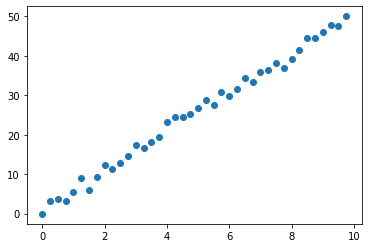

In [89]:
plt.scatter(x_train, y_train);

<i>Linear Model Continued</i>

The next step is to establish the computational graph for estimating the linear model.  This involves defining:

<ul>
    <li>variables for w and b (initially set at 0)</li>
    <li>placeholders for x and y</li>
    <li>the linear model as a node of the computation graph</li>
    <li>a loss function to be used by the optimizer to change the values of w and b in order to minimize the loss (in this case the mean squared error)</li>
    <li>an initializer to initialize the variables</li>
</ul>

Once these are defined we can create a session to run the initialization, as well as a 'training operation' in order to modify the values of w and b so that the loss is minimized.

In [90]:
w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = w * x + b
loss = tf.reduce_sum(tf.square(linear_model - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [91]:
sess = tf.Session()

sess.run(init)

for i in range(20):
    sess.run(training_op, feed_dict={x: x_train, y: y_train})
    print("Iteration {}: w: {:0.5f}, b: {:0.5f}".format(i, sess.run(w), sess.run(b)))

Iteration 0: w: 6.58667, b: 1.01166
Iteration 1: w: 4.52043, b: 0.69846
Iteration 2: w: 5.16780, b: 0.80070
Iteration 3: w: 4.96417, b: 0.77262
Iteration 4: w: 5.02743, b: 0.78537
Iteration 5: w: 5.00699, b: 0.78527
Iteration 6: w: 5.01281, b: 0.78916
Iteration 7: w: 5.01040, b: 0.79176
Iteration 8: w: 5.01058, b: 0.79473
Iteration 9: w: 5.00995, b: 0.79754
Iteration 10: w: 5.00958, b: 0.80036
Iteration 11: w: 5.00913, b: 0.80315
Iteration 12: w: 5.00872, b: 0.80590
Iteration 13: w: 5.00830, b: 0.80863
Iteration 14: w: 5.00788, b: 0.81134
Iteration 15: w: 5.00747, b: 0.81401
Iteration 16: w: 5.00707, b: 0.81666
Iteration 17: w: 5.00667, b: 0.81928
Iteration 18: w: 5.00627, b: 0.82187
Iteration 19: w: 5.00588, b: 0.82444


Note: The values of w and b can also be computed using linear algebra to estimate the coefficients from training data (see below). However, the focus here is on machine learning (not statistical analysis).

In [92]:
X = np.vstack((x_train, np.ones_like(x_train))).transpose()

<h3>Chapter 5: Predictive Analytics with TensorFlow and Deep Neural Networks</h3>

Using TensorFlow with three different models:

<ul>
    <li>Predictions with TensorFlow</li>
    <li>Regression with Deep Neural Nets (DNNs)</li>
    <li>Classification with DNNs</li>
</ul>

With each of these models, the same key elements will be employed:

<ul>
    <li>Architecture -- neurons in the input, elements in the output layer, and number of hidden layers along with the number of neurons in each.</li>
    <li>Activation function -- ReLU or a variant</li>
    <li>Optimization Algorithm -- Gradient Descent or Adam Optimizer</li>
    <li>Loss Function -- Cross-Entropy or Mean Squared Error</li>
    <li>Weights Initialization Strategy -- Typically use Xavier Initialization which comes as a default with the fully_connected function from TensorFlow.
    <li>Regularization Strategy -- Not used</li>
    <li>Training Strategy -- Specify the number of epochs and the batch size</li>
</ul>

<h4>Predictions with TensorFlow:</h4>



<h5>Intro to MNIST Dataset</h5>

The Mixed National Institute of Standards and Technology (MNIST) dataset contains 60K training and 10K testing images of handwritten digits from (0-9) formatted as 28x28 monochrome images. For every image there is a corresponding true label.

<h5>Building Classification Models</h5>



In [93]:
# incorporate requisite libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.contrib.layers import fully_connected

%matplotlib inline

In [94]:
# Activation Function (reLU)

def relu(x):
    return max(0.,x)

relu = np.vectorize(relu)

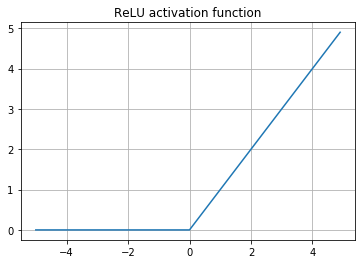

In [95]:
vector = np.arange(-5,5,0.1)
plt.plot(vector, relu(vector))
plt.grid()
plt.title("ReLU activation function");

In [96]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/")

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [97]:
# hidden layer counts

n_inputs = 28*28 
n_hidden1 = 350
n_hidden2 = 200 
n_hidden3 = 100
n_outputs = 10

In [98]:
# placeholders for inputs and labels

# input layer 
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
# target values
y = tf.placeholder(tf.int64)

In [99]:
# neural network

hidden1 = fully_connected(X, n_hidden1)
hidden2 = fully_connected(hidden1, n_hidden2)
hidden3 = fully_connected(hidden2, n_hidden3)
logits = fully_connected(hidden3, n_outputs, activation_fn=None)

In [100]:
# loss function

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
                   labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [101]:
# optimizer and training operations

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [102]:
# evaluation of accuracy of classification

correct = tf.nn.in_top_k(predictions=logits, targets=y, k=1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [103]:
# epoch and batch counts/sizes

n_epochs = 20
batch_size = 80

with tf.Session() as sess:
    
    ## Initializing the variables
    tf.global_variables_initializer().run()
   
    # training
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print("======= Epoch: {} ========".format(epoch+1))
        print("Train accuracy:", acc_train, "| Test accuracy:", acc_test)
        print(50*"-")
        
    print("Done Trainning!")

    ## Producing individual predictions
    
    print("\n=====================\n")
    print("Using the network to make individual predictions")
    n_pred = 15
    X_new = mnist.test.images[:n_pred]
    Z = logits.eval(feed_dict={X: X_new})
    y_pred = np.argmax(Z, axis=1)
    print("Actual | Predicted")
    print("=====================")
    for obs, pred in zip(mnist.test.labels[:n_pred], y_pred):
        print("{: >4}   |{: >6}".format(obs, pred))

<h4>Regression with Deep Neural Nets (DNNs)</h4>

Key elements of DNN Model for Predicting Diamond Prices

<ul>
    <li>Architecture -- 23 neurons in the input, 1 element in the output layer, and 3 hidden layers along with the 256 in first hidden layer, 128 in the 2nd, and 64 in the third.</li>
    <li>Activation function -- ReLU or a variant</li>
    <li>Optimization Algorithm -- Adam Optimizer</li>
    <li>Loss Function -- Mean Squared Error</li>
    <li>Weights Initialization Strategy -- Xavier initializer with fully_connected function as default</li>
    <li>Regularization Strategy -- Not used</li>
    <li>Training Strategy -- 40 epocks with 50 elements in each batch</li>
</ul>

In [104]:
# import libraries for Regression with DNNs

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import fully_connected

%matplotlib inline

In [105]:
# load input data

data_path= 'diamonds.csv'
diamonds = pd.read_csv(data_path)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

In [106]:
# prepare objects for modeling

from sklearn.preprocessing import RobustScaler
target_name = 'price'
robust_scaler = RobustScaler()
X = diamonds.drop('price', axis=1)
X = robust_scaler.fit_transform(X)
y = diamonds[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [107]:
n_epochs = 40
batch_size=50

In [108]:
# Create input pipeline

X_placeholder = tf.placeholder(X_train.dtype, shape=X_train.shape)
y_placeholder = tf.placeholder(y_train.dtype, shape=y_train.shape)

dataset = tf.data.Dataset.from_tensor_slices((X_placeholder, y_placeholder))
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()

In [109]:
# define architecture

n_inputs = X_train.shape[1] #23
n_hidden1 = 256
n_hidden2 = 128 
n_hidden3 = 64
n_outputs = 1

In [110]:
# placeholders for input values and labels

X = tf.placeholder(X_train.dtype, shape=[None,n_inputs])
y = tf.placeholder(y_train.dtype)

In [111]:
# building DNN

def DNN(X_values):
    hidden1 = fully_connected(X_values, n_hidden1)
    hidden2 = fully_connected(hidden1, n_hidden2)
    hidden3 = fully_connected(hidden2, n_hidden3)
    y_pred = fully_connected(hidden3, n_outputs, activation_fn=None)
    return tf.squeeze(y_pred)

In [112]:
# loss function

y_pred = DNN(X)
loss = tf.losses.mean_squared_error(labels=y, predictions=y_pred)

In [113]:
# Optimizer and training operations

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [114]:
# numpy arrays for evaluation purposes

train_mse = np.zeros(n_epochs)
test_mse = np.zeros(n_epochs)


In [115]:
# running computational graph

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        sess.run(iterator.initializer, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        while True:
            try:
                batch_data = sess.run(next_element)
                X_batch = batch_data[0]
                y_batch = batch_data[1]
                sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
            except tf.errors.OutOfRangeError:
                break
        print("=============EPOCH {}============".format(epoch+1))
        train_mse[epoch] = loss.eval(feed_dict={X:X_batch, y:y_batch})
        test_mse[epoch] = loss.eval(feed_dict={X:X_test, y:y_test})
        print('Training MSE:', round(train_mse[epoch],1))
        print('Test MSE:', round(test_mse[epoch],1))
    print("Done Trainning")
    
    ## Producing individual predictions
    print("\n=====================\n")
    print("Using the network to make individual predictions")
    n_pred = 25
    y_obs = y_test[:n_pred]
    y_predicted = y_pred.eval(feed_dict={X:X_test[:n_pred,]})
    print("Actual | Predicted")
    print("=====================") 
    for obs, pred in zip(y_obs, y_predicted):
        print("{: >8}   |{: >8}".format(round(obs), round(pred)))
    print("Correlation: ", np.corrcoef(y_obs, y_predicted)[0,1])

=============EPOCH 1============
Training MSE: 2183246.5
Test MSE: 934405.0
=============EPOCH 2============
Training MSE: 302694.9
Test MSE: 773064.6
=============EPOCH 3============
Training MSE: 203989.7
Test MSE: 719743.1
=============EPOCH 4============
Training MSE: 456728.7
Test MSE: 651133.5
=============EPOCH 5============
Training MSE: 408183.8
Test MSE: 614676.2
=============EPOCH 6============
Training MSE: 119095.6
Test MSE: 572656.0
=============EPOCH 7============
Training MSE: 900513.4
Test MSE: 551983.0
=============EPOCH 8============
Training MSE: 401901.3
Test MSE: 521795.7
=============EPOCH 9============
Training MSE: 402831.8
Test MSE: 501109.8
=============EPOCH 10============
Training MSE: 395038.9
Test MSE: 522760.6
=============EPOCH 11============
Training MSE: 182448.1
Test MSE: 458040.8
=============EPOCH 12============
Training MSE: 333263.7
Test MSE: 442044.3
=============EPOCH 13============
Training MSE: 463094.8
Test MSE: 431060.8
=============EPOCH 1

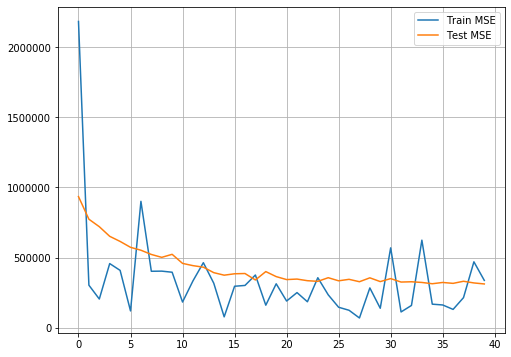

In [116]:
# graph of MSE changes

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(train_mse, label='Train MSE')
ax.plot(test_mse, label='Test MSE')
ax.legend()
ax.grid()

<h4>Classification with Deep Neural Nets (DNNs)</h4>

Key elements of DNN Model:

<ul>
    <li>Architecture -- 25 neurons in the input, 2 elements in the output layer, and 2 hidden layers along both with 200 neurons.</li>
    <li>Activation function -- ELU activation function</li>
    <li>Optimization Algorithm -- Adam Optimizer</li>
    <li>Loss Function -- Cross-entropy function</li>
    <li>Weights Initialization Strategy -- Xavier initializer with fully_connected function as default</li>
    <li>Regularization Strategy -- Not used</li>
    <li>Training Strategy -- 40 epocks with 100 elements in each batch</li>
</ul>

In [117]:
# libraries for DNN Classification

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score

from tensorflow.contrib.layers import fully_connected

%matplotlib inline

In [118]:
# Read and reconfigure input data

default = pd.read_csv('credit_card_default.csv')
default.rename(columns=lambda x: x.lower(), inplace=True)
default.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
# Base values: female, other_education, not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay_n features if >0 then it means the customer was delayed on that month
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    default[p] = (default[p] > 0).astype(int)

In [119]:
# Create objects for modeling including input pipeline for training and testing data

target_name = 'default'
X = default.drop('default', axis=1)
feature_names = X.columns
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12, stratify=y)

In [120]:
n_epochs = 40
batch_size = 100 

In [121]:
# input pipeline for DNN

X_placeholder = tf.placeholder(X_train.dtype, shape=X_train.shape)
y_placeholder = tf.placeholder(y_train.dtype, shape=y_train.shape)

dataset = tf.data.Dataset.from_tensor_slices((X_placeholder, y_placeholder))
dataset = dataset.shuffle(buffer_size=10000)
dataset = dataset.batch(batch_size)
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()

In [122]:
# architecture

n_inputs = X_train.shape[1] #25
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200
n_outputs = 2

In [123]:
# placeholders for inputs and labels

X = tf.placeholder(X_train.dtype, shape=[None,n_inputs])
y = tf.placeholder(y_train.dtype)

In [124]:
# building the neural network

def DNN(X_values):
    hidden1 = fully_connected(X_values, n_hidden1, activation_fn=tf.nn.elu)
    hidden2 = fully_connected(hidden1, n_hidden2, activation_fn=tf.nn.elu)
    hidden3 = fully_connected(hidden2, n_hidden3, activation_fn=tf.nn.elu)
    logits = fully_connected(hidden3, n_outputs, activation_fn=None)
    return tf.cast(logits, dtype=tf.float32)

In [125]:
# loss function

logits = DNN(X)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [126]:
# Evaluation nodes

probs = tf.nn.softmax(logits)

In [127]:
# optimizer and training operation

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [128]:
# run computational graph

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        sess.run(iterator.initializer, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        while True:
            try:
                batch_data = sess.run(next_element)
                X_batch = batch_data[0]
                y_batch = batch_data[1]
                sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
            except tf.errors.OutOfRangeError:
                break
        print("Epoch: {}".format(epoch+1))
    print("Done Trainning!")
    probabilities = probs.eval(feed_dict={X: X_test})[:,1]

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Done Trainning!


In [129]:
# Evaluting the model with a set threshhold

y_pred = (probabilities > 0.16).astype(int)
print('Recall: {:0.2f}'.format(100*recall_score(y_true=y_test, y_pred=y_pred)))
print('Precision: {:0.2f}'.format(100*precision_score(y_true=y_test, y_pred=y_pred)))
print('Accuracy: {:0.2f}'.format(100*accuracy_score(y_true=y_test, y_pred=y_pred)))

Recall: 76.51
Precision: 35.47
Accuracy: 64.00
